In [1]:
import numpy
import scipy
import pandas
import matplotlib
import sklearn
print("All libraries are installed successfully!")

# Python version
import sys
print('Python: {}'.format(sys.version))

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

All libraries are installed successfully!
Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
scipy: 1.14.1
numpy: 2.0.1
matplotlib: 3.9.2
pandas: 2.2.2
sklearn: 1.5.2


In [5]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [7]:
# Import necessary libraries for loading and manipulating the dataset
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Display the first 5 rows of the dataset to verify the data is loaded correctly
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Display the last 5 rows of the dataset to verify the data is loaded correctly
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# Dimensions of the dataset
print(dataset.shape)


(150, 5)


In [10]:
# Peek at the first 5 rows of data
print(dataset.head(5))


   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
# Statistical summary
print(dataset.describe())


       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:
# Class distribution
print(dataset.groupby('class').size())


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization (Univariate Plots)


In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

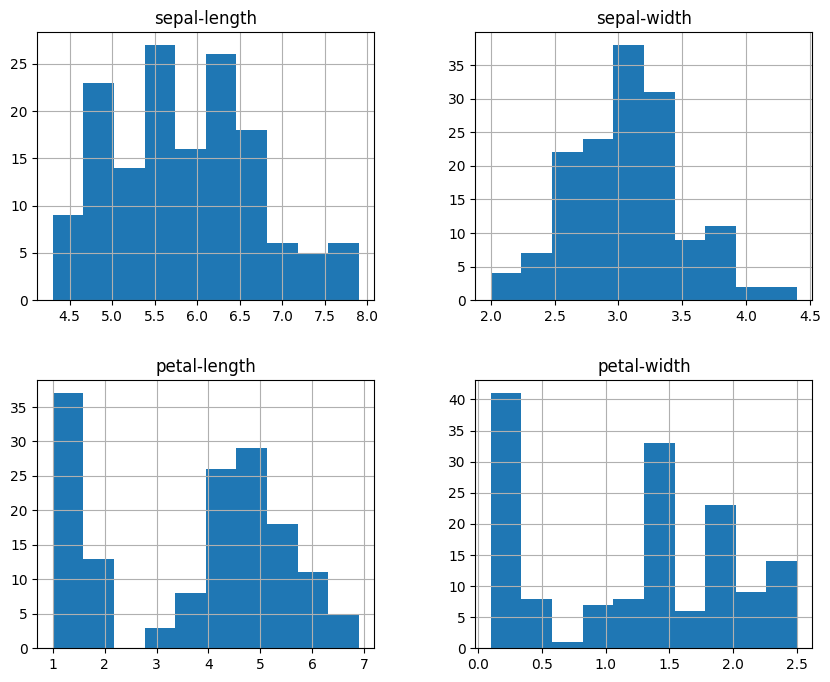

In [14]:
# histograms
dataset.hist(figsize=(10,8))
plt.show()

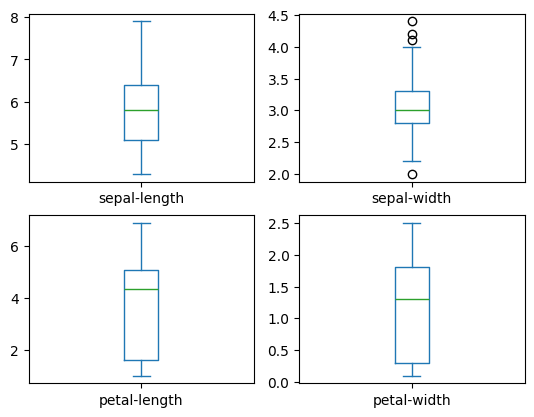

In [15]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Data Visualization (Multivariate Plots)

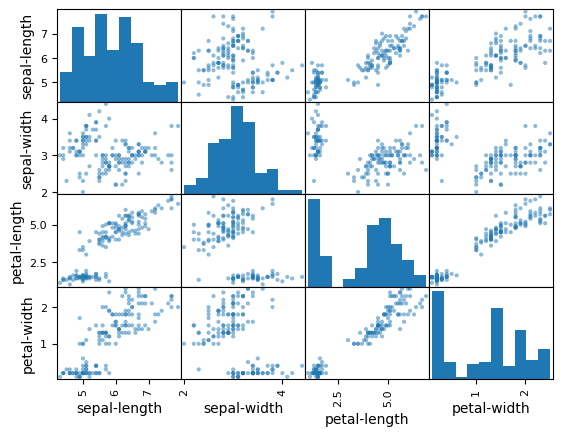

In [16]:
# Scatter Matrix
scatter_matrix(dataset)
plt.show()


# Create a Validation Dataset

In [17]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
 

# Build Models



In [19]:
# spot check algorithem
models =[] # list of models
# Logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
# Linear Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis())) 
# K-Nearest Neighbors
models.append(('KNN', KNeighborsClassifier()))
# Decision Tree (CART)
models.append(('CART', DecisionTreeClassifier()))
# Naive Bayes
models.append(('NB', GaussianNB()))
# Support Vector Machine
models.append(('SVM', SVC(gamma='auto')))


In [20]:
# Evaluate each model
results = []
names = []
for name, model in models:
    # 10-fold cross validation
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Model evaluation
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # Print mean accuracy and std deviation
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was de

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


# Select Best Model

C:\Users\prach\AppData\Local\Temp\ipykernel_20180\3207285824.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


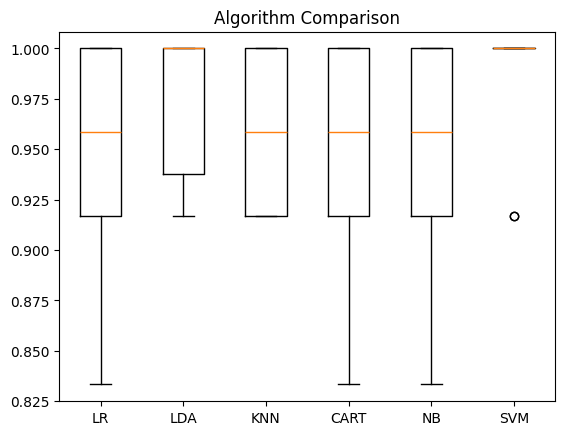

In [21]:
# Compare Algorithms using box-plot method
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Make Predictions

In [23]:
# Make Prediction on validation dataset
model = SVC(gamma='auto')
# fit the model on a training data
model.fit(X_train, Y_train)
# Prediction on a Validation set
prediction = model.predict(X_validation)


Evaluate Predictions

In [24]:
# Evaluate predictions
print(accuracy_score(Y_validation, prediction))  # Accuracy calculate karna
print(confusion_matrix(Y_validation, prediction))  # Confusion matrix banana
print(classification_report(Y_validation, prediction))  # Classification report nikalna


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

